## What cheese?

In [44]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai

1. Use DuckDuckGo to search for images of "bird photos"
1. Use DuckDuckGo to search for images of "forest photos"
1. Fine-tune a pretrained neural network to recognise these two groups
1. Try running this model on a picture of a bird and see if it works.

## Step 1: Download images of birds and non-birds

In [45]:
# Skip this cell if you already have duckduckgo_search installed
!pip install -Uqq duckduckgo_search

In [46]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

def search_images(term, max_images=200):This defines a function named search_images that takes in two arguments: a search term (term) and the maximum number of images to return (max_images). The function defaults to returning 200 images if max_images isn't provided.

Inside the function, ddg_images(term, max_results=max_images) is called. This performs an image search on DuckDuckGo with the specified search term and returns a list of dictionaries, where each dictionary represents an image and contains various pieces of information about the image, like its URL, title, and more.

L(...) is a Fastcore function that creates a list-like object with some additional functionality. One of these additional functionalities is the itemgot method.

.itemgot('image') is called on the list-like object. This returns a new list-like object that only contains the 'image' field of each dictionary in the original list. In this context, the 'image' field of the dictionary is the URL of the im  


Return is a keyword that is used in a function to indicate the result that the function should produce.When the Python interpreter encounters a return statement in a function, it immediately exits the function and sends the value specified after the return keyword back to the caller of the function.ge.rch:

Let's start by searching for a feta cheese photo and seeing what kind of result we get. We'll start by getting URLs from a search:

In [47]:
urls = search_images('feta cheese', max_images=1)
urls[0]

'https://www.greekboston.com/wp-content/uploads/2016/06/feta-cheese.jpg'

urls is a list containing a single URL as a string. search_images('feta cheese', max_images=1) searches for images of birds on DuckDuckGo and returns a list of up to 1 image URL. This list is then stored in the urls variable.

...and then download a URL and take a look at it:

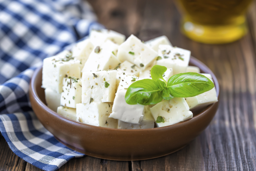

In [48]:
from fastdownload import download_url
dest = 'feta.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

from fastdownload import download_url: This line is importing the function download_url from the fastdownload library. This function allows us to download a file from a given URL.

dest =fetard.jpg': Here we're setting up the destination filename for our downloaded file. We're saying that we want to save the downloaded file as 'bird.jpg' in our current directory.

download_url(urls[0], dest, show_progress=False): This line is where the download action happens. download_url is a function that takes three arguments:

The first argument is the URL of the file you want to download. urls[0] is the first URL in the urls list, which should be a list of image URLs obtained from the search_images function in the previous part of the notebook.

The second argument is the destination filename for the downloaded file, which we previously set as 'bird.jpg'.

The third argument is a keyword argument show_progress. When set to True, this will show a progress bar for the download. Since it's set to False here, no progress bar will be shown.

In summary, this code downloads the first image from the urls list and saves it to the current directory with the filename 'bird.jpg', without showing a download p bar.








Docs on fastdownload library from fast.ai https://fastdownload.fast.ai/  and helpers https://fastdownload.fast.ai/core.html

Use when you have you have one or more URLs pointing at some archives you want to make available, and you want to ensure that your users download those archives correctly, have the latest version, and that it's as easy as possible for them to access the information in those archives

from fastai.vision.all import *: This line imports all the functions, classes, and other objects from the fastai.vision module. Fastai's vision module contains numerous tools for working with images and building and training deep learning models for computer vision tasks.

im = Image.open(dest): This line uses the open function of the Image class from the PIL (Python Imaging Library, also known as Pillow) library to open an image file. The dest variable should be a string representing the path to the image file. The opened image file is then stored in the im variable as an Image object.

It should be noted that while Fastai's vision module includes many tools for working with images, the Image class in this context is likely the one provided by the Pillow library, which is widely used in Python for opening, manipulating, and saving many different image file formats.

im.to_thumb(256,256): This line calls the to_thumb method of the Image object im. This method resizes the image to the specified size, preserving aspect ratio and filling all space, with the image centered. The size is specified as (width, height), so im.to_thumb(256,256) resizes the image so it fits within a 256x256 square. The resized image is then returned as a new Image object.

This is useful for creating thumbnail images, or for ensuring that all images passed to a machine learning model have the same dimensions.

Note that this code doesn't save the thumbnail image or display it; it just creates it. To save the thumbnail, you would need to use the save method of the Image object. To display the image in a Jupyter notebook, you could simply write the name of the Image object on its own line and run the cell.

Now let's do the same with "mozarella cheese":

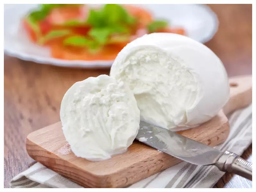

In [49]:
download_url(search_images('fresh mozarella cheese', max_images=1)[0], 'mozarella.jpg', show_progress=False)
Image.open('mozarella.jpg').to_thumb(256,256)

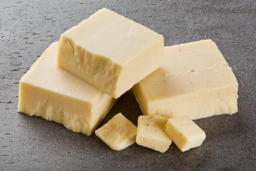

In [50]:
download_url(search_images('cheddar cheese', max_images=1)[0], 'cheddar.jpg', show_progress=False)
Image.open('cheddar.jpg').to_thumb(256,256)

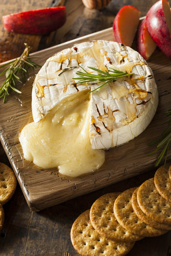

In [51]:
download_url(search_images('brie cheese', max_images=1)[0], 'brie.jpg', show_progress=False)
Image.open('brie.jpg').to_thumb(256,256)

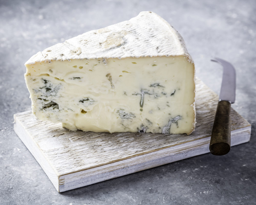

In [52]:
download_url(search_images('gorgonzola cheese', max_images=1)[0], 'gorgonzola.jpg', show_progress=False)
Image.open('gorgonzola.jpg').to_thumb(256,256)

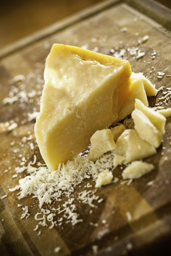

In [55]:
download_url(search_images('parmigiano cheese', max_images=1)[0], 'parmigiano.jpg', show_progress=False)
Image.open('parmigiano.jpg').to_thumb(256,256)

Our searches seem to be giving reasonable results, so let's grab 200 examples of each of the cheese photos, and save each group of photos to a different folder:

In [58]:
searches = 'feta','fresh mozarella','cheddar','brie','gorgonzola','parmigiano'
extra_terms = ['', 'sliced', 'recipe'] # '' corresponds to the origial search without extra term
max_images = 200 # Maximum number of images allowed per cheese folder. Won't delete any extras

path = Path('cheese data')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)

     # Check if there are already more than max_images in the folder
    if len(get_image_files(dest)) > max_images:
        continue  # Skip downloading extra images
    
    for extra in extra_terms:
        download_images(dest, urls=search_images(f'{o} cheese {extra}'))
        sleep(10)  # Pause between searches to avoid over-loading server
    
    resize_images(path/o, max_size=400, dest=path/o)

## Step 2: Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [59]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

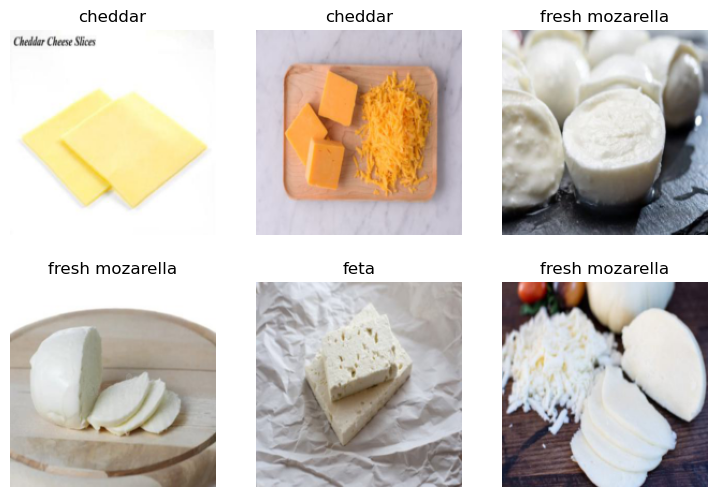

In [60]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

### show batch = examples of data passed into model

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "brie" or "gorgonzola").

    get_items=get_image_files, 

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be *bird* or *forest*).

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

<span style="color:green"> ---- Learner - combines model (neural network function + input data ). data = dls object. model  = resnet18 (fastai built-in model)</span>  

<span style="color:green"> ---- Fastai has integration of timm - largest library of vision models. (timm.fast.ai) </span>  

<span style="color:green"> ---- fastai will download pre-trained weights by default. </span>   

<span style="color:green"> ---- Fine_tune = uses the downloaded pretrained weights, adjusts them to teach model the differences between original data it was trained on (imagenet) and the new data that is currently being used </span>  

In [61]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.933678,0.535080,0.155673,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.578902,0.273666,0.094987,00:08
1,0.308854,0.229082,0.071240,00:09
2,0.176731,0.224591,0.073879,00:08


Generally when I run this I see 100% accuracy on the validation set (although it might vary a bit from run to run).

"Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset (called the *pretrained model*), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in *imagenet*, and widely-used computer vision dataset with images covering 1000 categories) For details on fine-tuning and why it's important, check out the [free fast.ai course](https://course.fast.ai/).  


## Step 3: Use our model (and build your own!)

Let's see what our model thinks about that bird we downloaded at the start:  
cordingly.

-------------------------------------------------------------------------------------
*NOTES*
*Inference*

is_bird,_,probs = learn.predict(PILImage.create('bird.jpg')): This line is using the trained model (learn) to make a prediction on the bird image. The image is opened and converted into a PIL Image object with PILImage.create('bird.jpg'), and then passed to learn.predict(). This function returns three values:  


is_bird: The model's prediction. This is a string representing the class that the model has predicted for the image. In this case, it might be 'bird' or 'not_bird', for instance, depending on the categories your model has been trained on.

_: This is a placeholder for the second value returned by learn.predict(), which is the index of the predicted class (e.g., 0 for the first class, 1 for the second class). The underscore _ is a common convention in Python for a variable that we don't care about and aren't going to  When the predict method is called on a Learner object in fastai, it actually returns three items: the predicted class, the index of that class, and the probabilities of all classes. So if we don't use _ and only write is_bird, probs = learn.predict(PILImage.create('bird.jpg')), we would get a ValueError because there are three items to unpack, not two.use.

probs: The probabilities associated with each class. This is a tensor (similar to an array) containing the probability that the model assigns to each class for the given image. The probabilities are ordered according to the order of the cla
ses.

print(f"This is a: {is_bird}."): This line prints out the predicted class of the image.

print(f"Probability it's a bird: {probs[0]:.4f}"): This line prints out the probability that the model assigned to the first class. This assumes that the class corresponding to 'bird' is the first class. The :.4f in the curly braces is a format specification for the float; it means that the float will be formatted with 4 digits after the decimal point. If your 'bird' class is not the first class, you should adjust cordingly.

In [67]:
is_cheese,_,probs = learn.predict(PILImage.create('cheddar.jpg'))
idx = learn.dls.vocab.o2i[is_cheese]

print(f"This is a: {is_cheese}.")
print(f"Probability it's a {is_cheese}: {probs[idx]:.4f}")

This is a: cheddar.
Probability it's a cheddar: 0.9998


Good job, resnet18. :)

So, as you see, in the space of a few years, creating computer vision classification models has gone from "so hard it's a joke" to "trivially easy and free"!

It's not just in computer vision. Thanks to deep learning, computers can now do many things which seemed impossible just a few years ago, including [creating amazing artworks](https://openai.com/dall-e-2/), and [explaining jokes](https://www.datanami.com/2022/04/22/googles-massive-new-language-model-can-explain-jokes/). It's moving so fast that even experts in the field have trouble predicting how it's going to impact society in the coming years.

One thing is clear -- it's important that we all do our best to understand this technology, because otherwise we'll get left behind!